In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [135]:
#!pip install folium
#!pip install tensorflow
#!pip install xgboost

In [52]:
data=pd.read_csv("earth.csv")
print(data)

      latitude  longitude  depth  mag magType    gap      dmin   rms  \
0      23.6610    96.0256  10.00  4.6      mb   64.0  1.676000  0.61   
1      23.6551    94.0597  10.00  3.8      mb  117.0  0.612000  1.06   
2      34.6953    79.7421  10.00  4.5      mb  109.0  5.466000  0.75   
3      32.4723    86.9509  10.00  4.9      mb   84.0  4.522000  1.09   
4      33.5899    71.6300  46.36  4.5      mb   91.0  1.368000  0.69   
...        ...        ...    ...  ...     ...    ...       ...   ...   
3096   10.8290    91.7010  35.00  4.6      mb  184.2  2.899764  1.22   
3097   10.8330    91.7110  26.70  5.5     mwc   25.8  2.899764  0.97   
3098   10.8440    91.7850  39.10  4.6      mb  102.9  2.899764  0.82   
3099   30.1080    83.4410  17.20  3.9      mb  145.4  2.899764  1.38   
3100   12.9260    93.2870  35.00  3.8      mb  197.3  2.899764  0.77   

              id                             place  depthError  magError  \
0     us70006quh       96 km NNW of Mogok, Myanmar         

In [53]:

import pandas as pd

# Assuming 'data' is your DataFrame
# Reverse the order of rows
data = data.iloc[::-1]

# Reset the index if needed
data.reset_index(drop=True, inplace=True)

# Now, 'data_inverse' has the entire dataset inverted, bottom to top
print(data)



      latitude  longitude  depth  mag magType    gap      dmin   rms  \
0      12.9260    93.2870  35.00  3.8      mb  197.3  2.899764  0.77   
1      30.1080    83.4410  17.20  3.9      mb  145.4  2.899764  1.38   
2      10.8440    91.7850  39.10  4.6      mb  102.9  2.899764  0.82   
3      10.8330    91.7110  26.70  5.5     mwc   25.8  2.899764  0.97   
4      10.8290    91.7010  35.00  4.6      mb  184.2  2.899764  1.22   
...        ...        ...    ...  ...     ...    ...       ...   ...   
3096   33.5899    71.6300  46.36  4.5      mb   91.0  1.368000  0.69   
3097   32.4723    86.9509  10.00  4.9      mb   84.0  4.522000  1.09   
3098   34.6953    79.7421  10.00  4.5      mb  109.0  5.466000  0.75   
3099   23.6551    94.0597  10.00  3.8      mb  117.0  0.612000  1.06   
3100   23.6610    96.0256  10.00  4.6      mb   64.0  1.676000  0.61   

              id                             place  depthError  magError  \
0     usp000gnr8  149 km NNE of Bamboo Flat, India         

# Clustering

In [54]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Select the features for clustering (latitude and longitude)
X = data[['latitude', 'longitude']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the GMM model
gmm = GaussianMixture(n_components=5, random_state=42)
cluster_labels = gmm.fit_predict(X_scaled)

# Add cluster labels to the dataset
data['cluster'] = cluster_labels

C:\Users\Anshika Sharma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


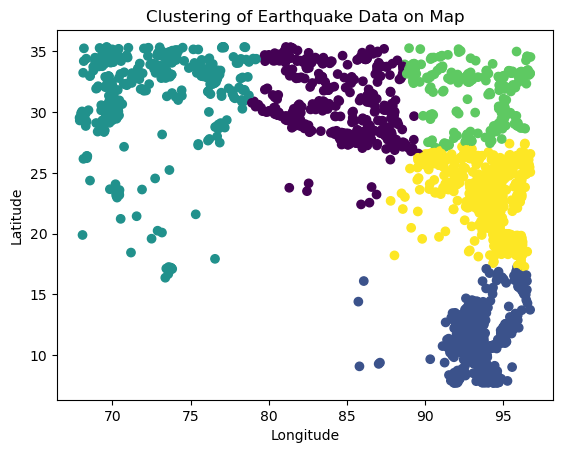

In [55]:
from sklearn.cluster import KMeans
# Extract latitude and longitude for clustering
X = data[['latitude', 'longitude']]

# Choose the number of clusters (K)
num_clusters = 5

# Apply K-means clustering on geographical coordinates
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Create a folium map
map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=5)

# Add clustered data points to the map
for index, row in data.iterrows():
    color = 'blue' if row['cluster'] == 0 else 'green' if row['cluster'] == 1 else 'red'
    folium.Marker([row['latitude'], row['longitude']], popup=f'Cluster: {row["cluster"]}', icon=folium.Icon(color=color)).add_to(map)

# Save the map as an HTML file
map.save("clustered_map.html")

# Visualize the clusters with different colors on the map using matplotlib
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Earthquake Data on Map')
plt.show()

# Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

# Convert magType and country categorical variables into numerical values
label_encoder_magType = LabelEncoder()
data['magType'] = label_encoder_magType.fit_transform(data['magType'])

label_encoder_country = LabelEncoder()
data['country'] = label_encoder_country.fit_transform(data['country'])

# Print the mapping
magType_mapping = dict(zip(label_encoder_magType.classes_, label_encoder_magType.transform(label_encoder_magType.classes_)))
print("Mapping for magType:")
print(magType_mapping)

country_mapping = dict(zip(label_encoder_country.classes_, label_encoder_country.transform(label_encoder_country.classes_)))
print("\nMapping for country:")
print(country_mapping)

Mapping for magType:
{'mb': 0, 'ml': 1, 'mwb': 2, 'mwc': 3, 'mwr': 4, 'mww': 5}

Mapping for country:
{'Afghanistan': 0, 'Bangladesh': 1, 'Bay of Bengal': 2, 'Bhutan': 3, 'China': 4, 'India': 5, 'India region': 6, 'Indonesia': 7, 'Kashmir-India border region': 8, 'Myanmar': 9, 'Myanmar-India border region': 10, 'Nepal': 11, 'Pakistan': 12, 'Thailand': 13, 'western Xizang': 14}


# Cluster based on mag

In [57]:
missing_values = data['cluster'].isnull().sum();missing_values
data['cluster'] = pd.factorize(data['cluster'])[0]

In [58]:
min_magnitude = data['mag'].min()
max_magnitude = data['mag'].max()

print("Minimum Magnitude:", min_magnitude)
print("Maximum Magnitude:", max_magnitude)

Minimum Magnitude: 2.9
Maximum Magnitude: 7.8


In [59]:
minimum_magnitude = 2.9
maximum_magnitude = 7.8

# Define boundaries for two clusters
low_boundary_cluster1 = minimum_magnitude
high_boundary_cluster1 = 5.0
low_boundary_cluster2 = 5.0
high_boundary_cluster2 = maximum_magnitude

# Print boundaries
print("Cluster 1 Boundaries (Magnitudes less than 5):")
print("Low Boundary:", low_boundary_cluster1)
print("High Boundary:", high_boundary_cluster1)
print("\nCluster 2 Boundaries (Magnitudes greater than or equal to 5):")
print("Low Boundary:", low_boundary_cluster2)
print("High Boundary:", high_boundary_cluster2)

Cluster 1 Boundaries (Magnitudes less than 5):
Low Boundary: 2.9
High Boundary: 5.0

Cluster 2 Boundaries (Magnitudes greater than or equal to 5):
Low Boundary: 5.0
High Boundary: 7.8


      latitude  longitude  depth  mag  magType    gap      dmin   rms  \
0      12.9260    93.2870  35.00  3.8        0  197.3  2.899764  0.77   
1      30.1080    83.4410  17.20  3.9        0  145.4  2.899764  1.38   
2      10.8440    91.7850  39.10  4.6        0  102.9  2.899764  0.82   
3      10.8330    91.7110  26.70  5.5        3   25.8  2.899764  0.97   
4      10.8290    91.7010  35.00  4.6        0  184.2  2.899764  1.22   
...        ...        ...    ...  ...      ...    ...       ...   ...   
3096   33.5899    71.6300  46.36  4.5        0   91.0  1.368000  0.69   
3097   32.4723    86.9509  10.00  4.9        0   84.0  4.522000  1.09   
3098   34.6953    79.7421  10.00  4.5        0  109.0  5.466000  0.75   
3099   23.6551    94.0597  10.00  3.8        0  117.0  0.612000  1.06   
3100   23.6610    96.0256  10.00  4.6        0   64.0  1.676000  0.61   

              id                             place  depthError  magError  \
0     usp000gnr8  149 km NNE of Bamboo Flat, In

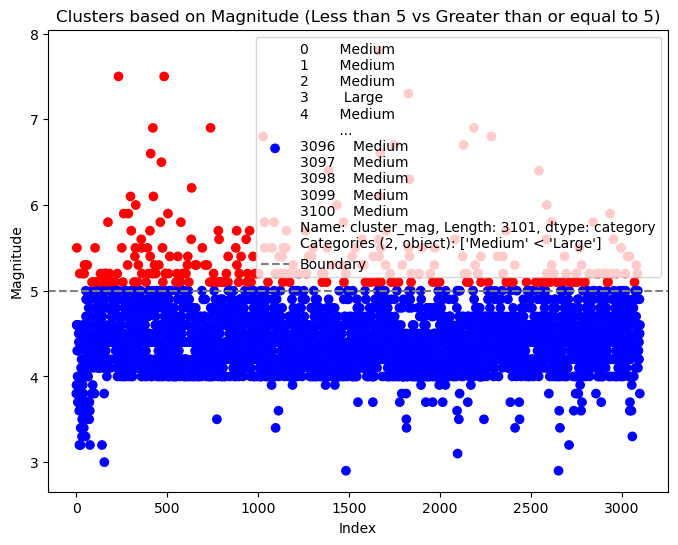

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the boundaries
low_boundary = 5.0

# Create labels for the clusters
labels = ['Medium', 'Large']

# Create clusters based on magnitude
data['cluster_mag'] = pd.cut(data['mag'], bins=[-float('inf'), low_boundary, float('inf')], labels=labels)

# Display the clusters
print(data)

# Count the number of occurrences for each cluster
cluster_counts = data['cluster_mag'].value_counts()

# Display the cluster counts
print(cluster_counts)

# Plot the clusters
plt.figure(figsize=(8, 6))
colors = {'Medium': 'blue', 'Large': 'red'}
plt.scatter(data.index, data['mag'], c=data['cluster_mag'].apply(lambda x: colors[x]), label=data['cluster_mag'])
plt.axhline(y=low_boundary, color='gray', linestyle='--', label='Boundary')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Clusters based on Magnitude (Less than 5 vs Greater than or equal to 5)')
plt.legend()
plt.show()

# Normalization

In [61]:

from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['latitude', 'longitude', 'depth', 'mag','gap','dmin','rms','depthError','time_seconds', 'cluster']
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [ ]:
import pandas as pd

# Assuming 'X' and 'y' are your input features and target variables, respectively

# Define the indices for train and test sets
train_indices = range(0, len(X) * 8 // 10)  # 80% for training
test_indices = range(len(X) * 8 // 10, len(X))  # Remaining 20% for testing

# Split the input features and target variables into training and testing sets using slicing
X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

# Now, 'X_train' and 'y_train' contain the training set, and 'X_test' and 'y_test' contain the testing set

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame containing both input features and target variables

# Define the indices for train and test sets
train_indices = range(0, len(data) * 8 // 10)  # 80% for training
test_indices = range(len(data) * 8 // 10, len(data))  # Remaining 20% for testing

# Split the data into training and testing sets using slicing
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

# Separate input features (X) and target variables (y) for both training and testing sets
X_train = train_data[['latitude', 'longitude', 'depth', 'mag', 'time_seconds']]
y_train = train_data[['cluster', 'mag', 'time_seconds']]

X_test = test_data[['latitude', 'longitude', 'depth', 'mag', 'time_seconds']]
y_test = test_data[['cluster', 'mag', 'time_seconds']]

# Now, 'X_train' and 'y_train' contain the training set, and 'X_test' and 'y_test' contain the testing set

# LSTM Shared Layer

In [66]:
import numpy as np     # overall= 0.12646
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError

# Load your data
# Assuming data is loaded and preprocessed before this point
#data = data[data['cluster_mag'] == 'Medium']

# Define input (X) and output (y) variables
X = data[['latitude', 'longitude', 'depth', 'mag', 'time_seconds','cluster']].values
y_mag = data['mag'].values
y_time_seconds = data['time_seconds'].values
y_location = pd.get_dummies(data['cluster']).values

# Split the dataset into train and test sets
X_train, X_test, y_mag_train, y_mag_test, y_time_seconds_train, y_time_seconds_test, y_location_train, y_location_test = train_test_split(X, y_mag, y_time_seconds, y_location, test_size=0.2)

# Reshape the input data for LSTM
# Add a timestep dimension since LSTM expects 3D input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define shared input layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Model for Magnitude prediction
mag_branch = Dense(64, activation='relu')(input_layer)
mag_output = Dense(1)(mag_branch)

# Model for Timestamp prediction
time_branch = LSTM(units=15, dropout=0.2, recurrent_dropout=0.2)(input_layer)
time_output = Dense(1)(time_branch)

# Model for Location prediction
location_branch = LSTM(units=64, dropout=0.2, recurrent_dropout=0.2)(input_layer)
location_output = Dense(y_location.shape[1], activation='softmax')(location_branch)

# Define models
magnitude_model = Model(inputs=input_layer, outputs=mag_output)
time_seconds_model = Model(inputs=input_layer, outputs=time_output)
location_model = Model(inputs=input_layer, outputs=location_output)

# Compile models
magnitude_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError(), RootMeanSquaredError()])
time_seconds_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError(), RootMeanSquaredError()])
location_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
magnitude_model.fit(X_train, y_mag_train, epochs=50, batch_size=128, validation_split=0.2, verbose=2)
time_seconds_model.fit(X_train, y_time_seconds_train, epochs=50, batch_size=128, validation_split=0.2, verbose=2)
location_model.fit(X_train, y_location_train, epochs=50, batch_size=128, validation_split=0.2, verbose=2)


# Evaluate models
mag_loss, mag_mae, mag_rmse = magnitude_model.evaluate(X_test, y_mag_test, verbose=0)
time_loss, time_mae, time_rmse = time_seconds_model.evaluate(X_test, y_time_seconds_test, verbose=0)
location_loss, location_accuracy = location_model.evaluate(X_test, y_location_test, verbose=0)

print("Magnitude Model Loss:", mag_loss)
print("Magnitude Model MAE:", mag_mae)
print("Magnitude Model RMSE:", mag_rmse)

print("Time Seconds Model Loss:", time_loss)
print("Time Seconds Model MAE:", time_mae)
print("Time Seconds Model RMSE:", time_rmse)

print("Location Model Loss:", location_loss)
print("Location Model Accuracy:", location_accuracy)


Epoch 1/50
15/15 - 2s - 144ms/step - loss: 0.0212 - mean_absolute_error: 0.1176 - root_mean_squared_error: 0.1455 - val_loss: 0.0084 - val_mean_absolute_error: 0.0757 - val_root_mean_squared_error: 0.0918
Epoch 2/50
15/15 - 0s - 10ms/step - loss: 0.0084 - mean_absolute_error: 0.0734 - root_mean_squared_error: 0.0918 - val_loss: 0.0048 - val_mean_absolute_error: 0.0554 - val_root_mean_squared_error: 0.0694
Epoch 3/50
15/15 - 0s - 10ms/step - loss: 0.0060 - mean_absolute_error: 0.0614 - root_mean_squared_error: 0.0775 - val_loss: 0.0045 - val_mean_absolute_error: 0.0535 - val_root_mean_squared_error: 0.0669
Epoch 4/50
15/15 - 0s - 10ms/step - loss: 0.0054 - mean_absolute_error: 0.0582 - root_mean_squared_error: 0.0732 - val_loss: 0.0042 - val_mean_absolute_error: 0.0525 - val_root_mean_squared_error: 0.0652
Epoch 5/50
15/15 - 0s - 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0565 - root_mean_squared_error: 0.0710 - val_loss: 0.0040 - val_mean_absolute_error: 0.0509 - val_root_mean_sq

In [64]:
import pandas as pd

y_mag_pred = magnitude_model.predict(X_test)
y_time_seconds_pred = time_seconds_model.predict(X_test)
y_location_pred = location_model.predict(X_test)


# Convert the time, actual magnitudes, and predicted magnitudes into a DataFrame
results_df = pd.DataFrame({
    'Time (seconds)': y_time_seconds_test,
    'Actual Magnitude': y_mag_test,
    'Predicted Magnitude': y_mag_pred.flatten()  # Flatten to match the shape of y_time_seconds_test
})

# Sort the DataFrame by time
results_df = results_df.sort_values(by='Time (seconds)')

# Print the DataFrame
print(results_df)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
     Time (seconds)  Actual Magnitude  Predicted Magnitude
91         0.000296          0.224490             0.281730
319        0.000697          0.326531             0.308674
99         0.000999          0.061224             0.275738
71         0.001551          0.061224             0.266103
128        0.002344          0.224490             0.306916
..              ...               ...                  ...
73         0.992447          0.285714             0.325599
144        0.992878          0.367347             0.309863
330        0.993129          0.326531             0.304079
171        0.994270          0.346939             0.316977
539        0.996861          0.265306             0.306253

[565 rows x 3 columns]


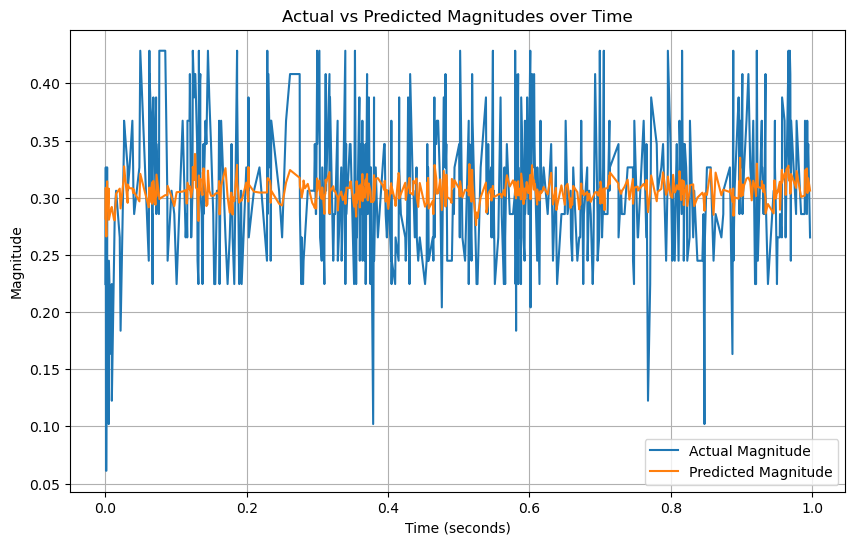

In [65]:
import matplotlib.pyplot as plt

# Plot actual and predicted magnitudes with respect to time
plt.figure(figsize=(10, 6))
plt.plot(results_df['Time (seconds)'], results_df['Actual Magnitude'], label='Actual Magnitude')
plt.plot(results_df['Time (seconds)'], results_df['Predicted Magnitude'], label='Predicted Magnitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Magnitude')
plt.title('Actual vs Predicted Magnitudes over Time')
plt.legend()
plt.grid(True)
plt.show()


# LSTM

C:\Users\Anshika Sharma\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/29
20/20 - 5s - 272ms/step - loss: 0.1298
Epoch 2/29
20/20 - 2s - 117ms/step - loss: 0.0463
Epoch 3/29
20/20 - 2s - 110ms/step - loss: 0.0239
Epoch 4/29
20/20 - 2s - 108ms/step - loss: 0.0098
Epoch 5/29
20/20 - 2s - 108ms/step - loss: 0.0042
Epoch 6/29
20/20 - 2s - 107ms/step - loss: 0.0018
Epoch 7/29
20/20 - 2s - 108ms/step - loss: 0.0012
Epoch 8/29
20/20 - 2s - 108ms/step - loss: 7.7455e-04
Epoch 9/29
20/20 - 2s - 107ms/step - loss: 4.6480e-04
Epoch 10/29
20/20 - 2s - 111ms/step - loss: 2.4945e-04
Epoch 11/29
20/20 - 2s - 110ms/step - loss: 1.3679e-04
Epoch 12/29
20/20 - 2s - 108ms/step - loss: 8.0949e-05
Epoch 13/29
20/20 - 2s - 108ms/step - loss: 5.3070e-05
Epoch 14/29
20/20 - 2s - 108ms/step - loss: 3.7620e-05
Epoch 15/29
20/20 - 2s - 108ms/step - loss: 3.0016e-05
Epoch 16/29
20/20 - 2s - 107ms/step - loss: 2.6071e-05
Epoch 17/29
20/20 - 2s - 109ms/step - loss: 2.3564e-05
Epoch 18/29
20/20 - 2s - 107ms/step - loss: 2.2434e-05
Epoch 19/29
20/20 - 2s - 107ms/step - loss: 2.1

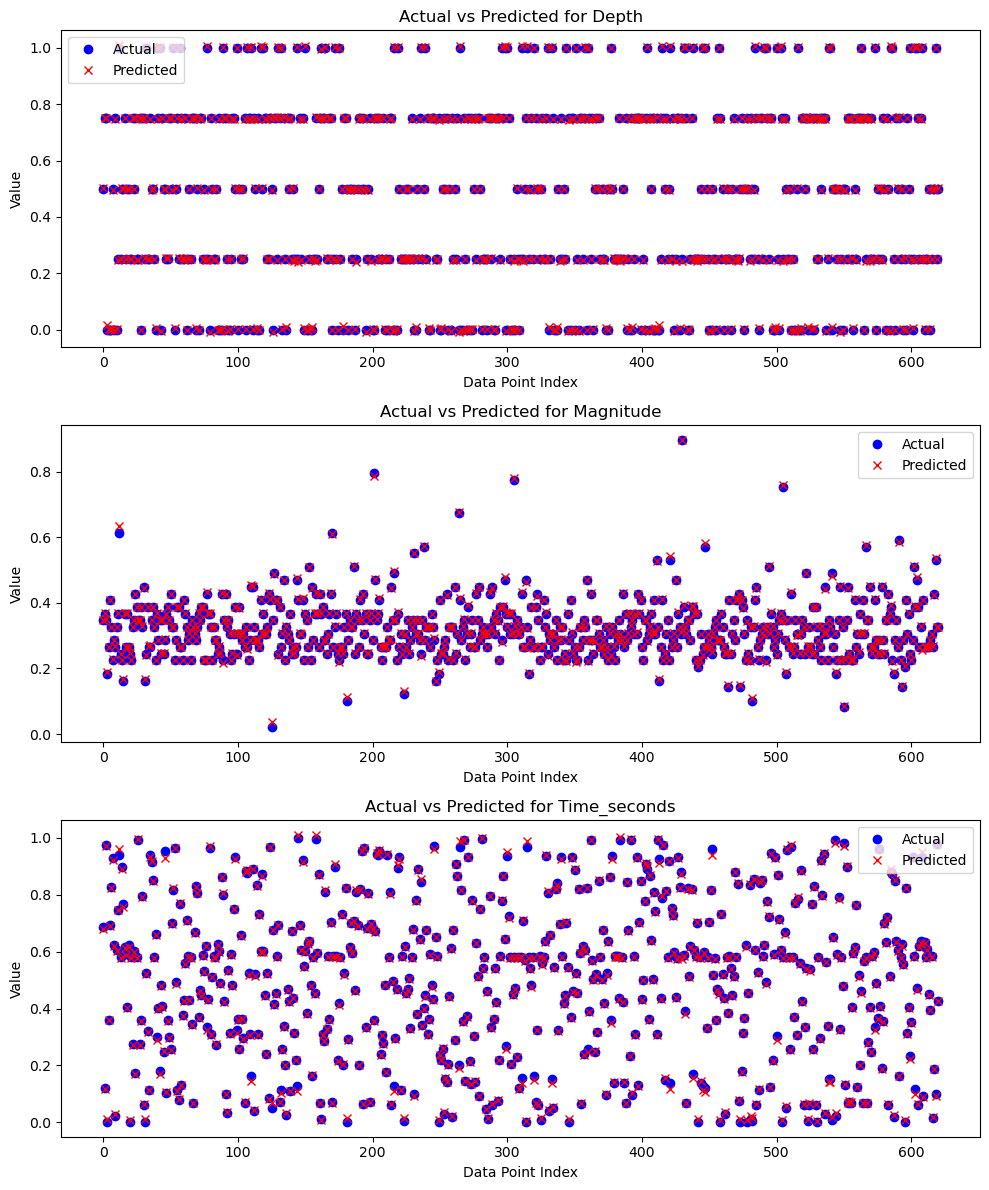

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define input (X) and output (y) variables
#X = data[['latitude', 'longitude', 'depth', 'mag', 'time_seconds','cluster']].values
#y = data[['cluster', 'mag', 'time_seconds']].values

# Scale the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the output variables
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(1500, activation='leaky_relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(3))  # 3 output variables
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=29, batch_size=128, verbose=2)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", mse)

mse = model.evaluate(X_train, y_train, verbose=0)
print("Train MSE:", mse)

# Predict on test data
y_pred = model.predict(X_test)

# Inverse scaling of predictions
y_pred_inv = scaler_y.inverse_transform(y_pred)

# Print some predictions and actual values
print("Predictions:")
print(y_pred_inv[:5])
print("Actual Values:")
print(y_test[:5])
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for each target variable
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

for i in range(3):  # Plot for each target variable
    ax = axes[i]
    ax.plot(y_test[:, i], label='Actual', marker='o', linestyle='', color='blue')
    ax.plot(y_pred_inv[:, i], label='Predicted', marker='x', linestyle='', color='red')
    ax.set_title(f'Actual vs Predicted for {["Depth", "Magnitude", "Time_seconds"][i]}')
    ax.set_xlabel('Data Point Index')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()



     Time (seconds)  Actual Magnitude  Predicted Magnitude
505        0.000000          0.183673             0.759162
349        0.000275          0.530612             0.245839
215        0.000289          0.346939             0.348747
588        0.000299          0.204082             0.285433
348        0.000475          0.163265             0.310801
..              ...               ...                  ...
351        0.981986          0.224490             0.219590
116        0.991145          0.306122             0.266038
619        0.995526          0.244898             0.328031
258        0.997215          0.285714             0.327663
356        1.000000          0.346939             0.286279

[621 rows x 3 columns]


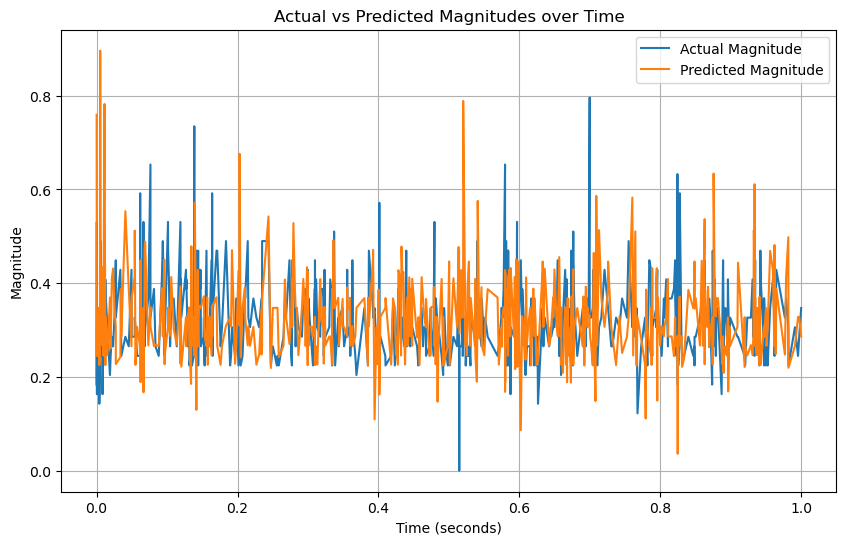

In [47]:
import pandas as pd
# Convert the time, actual magnitudes, and predicted magnitudes into a DataFrame
results_df = pd.DataFrame({
    'Time (seconds)': y_time_seconds_test,
    'Actual Magnitude': y_mag_test,
    'Predicted Magnitude': y_pred_inv[:, 1] # Flatten to match the shape of y_time_seconds_test
})

# Sort the DataFrame by time
results_df = results_df.sort_values(by='Time (seconds)')

# Print the DataFrame
print(results_df)

import matplotlib.pyplot as plt

# Plot actual and predicted magnitudes with respect to time
plt.figure(figsize=(10, 6))
plt.plot(results_df['Time (seconds)'], results_df['Actual Magnitude'], label='Actual Magnitude')
plt.plot(results_df['Time (seconds)'], results_df['Predicted Magnitude'], label='Predicted Magnitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Magnitude')
plt.title('Actual vs Predicted Magnitudes over Time')
plt.legend()
plt.grid(True)
plt.show()


# Hybrid Model

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


X = data[['latitude', 'longitude', 'depth', 'mag', 'time_seconds','cluster']]
y = data[['cluster', 'mag', 'time_seconds']]

# Split the dataset into features (X) and the target variables (y)
#X = data_low.drop(columns=['latitude', 'longitude', 'mag', 'time_seconds', 'cluster_mag', 'cluster', 'id', 'place', 'year', 'month', 'country'])
#y = data_low[['latitude', 'longitude', 'mag', 'time_seconds']]  # Target variables

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train separate XGBoost models for each target variable
models = {}
for target_col in y.columns:
    model = XGBRegressor()
    model.fit(X_train, y_train[target_col])
    models[target_col] = model

# Make predictions on the testing data for each target variable
y_preds = pd.DataFrame(index=X_test.index)
for target_col, model in models.items():
    y_preds[target_col] = model.predict(X_test)

# Calculate the overall MSE for all target variables combined
overall_mse = mean_squared_error(y_test.values.flatten(), y_preds.values.flatten())
print("Overall Mean Squared Error:", overall_mse)


Overall Mean Squared Error: 0.0066366296506802395


In [43]:
import pandas as pd

# Convert the time, actual magnitudes, and predicted magnitudes into a DataFrame
results_df = pd.DataFrame({
    'Time (seconds)': y_time_seconds_test,
    'Actual Magnitude': y_mag_test,
    'Predicted Magnitude': y_preds['mag']  # Flatten to match the shape of y_time_seconds_test
})

# Sort the DataFrame by time
results_df = results_df.sort_values(by='Time (seconds)')

# Print the DataFrame
print(results_df)

      Time (seconds)  Actual Magnitude  Predicted Magnitude
2985        0.000000          0.183673             0.448933
2829        0.000275          0.530612             0.387744
2695        0.000289          0.346939             0.572445
3068        0.000299          0.204082             0.122453
2828        0.000475          0.163265             0.265313
...              ...               ...                  ...
2831        0.981986          0.224490             0.244919
2596        0.991145          0.306122             0.597307
3099        0.995526          0.244898             0.204708
2738        0.997215          0.285714             0.224526
2836        1.000000          0.346939             0.367335

[621 rows x 3 columns]


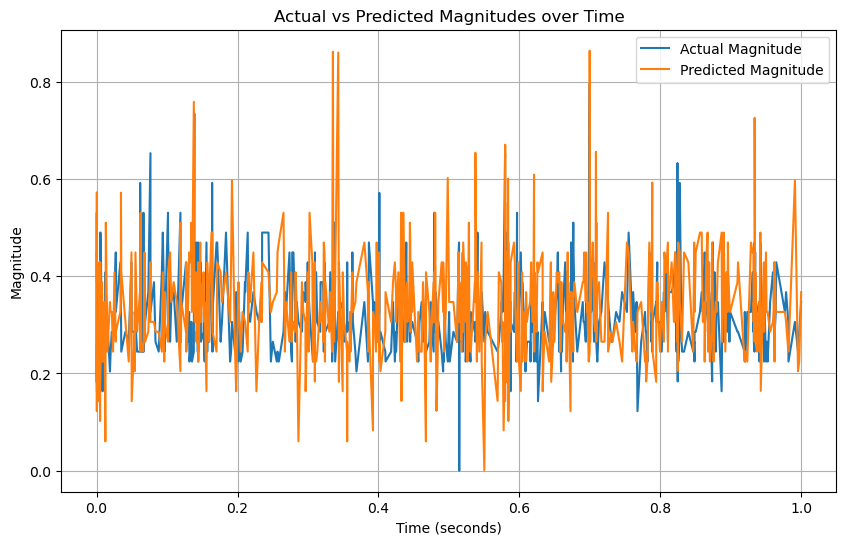

In [44]:
import matplotlib.pyplot as plt

# Plot actual and predicted magnitudes with respect to time
plt.figure(figsize=(10, 6))
plt.plot(results_df['Time (seconds)'], results_df['Actual Magnitude'], label='Actual Magnitude')
plt.plot(results_df['Time (seconds)'], results_df['Predicted Magnitude'], label='Predicted Magnitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Magnitude')
plt.title('Actual vs Predicted Magnitudes over Time')
plt.legend()
plt.grid(True)
plt.show()

# ANN

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'data' is your DataFrame containing input and output variables

# Split the data into input (X) and output (y) variables
#X = data[['latitude', 'longitude', 'depth', 'mag', 'time_seconds']]
#y = data[['cluster', 'mag', 'time_seconds']]

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1])  # Output layer with number of neurons equal to number of output variables
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model
loss, mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test MSE:", mse)

# Predict using the model
predictions = model.predict(X_test_scaled)


Epoch 1/50


C:\Users\Anshika Sharma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 - 2s - 39ms/step - loss: 0.1069 - mse: 0.1069 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 2/50
62/62 - 0s - 4ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 3/50
62/62 - 0s - 4ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 4/50
62/62 - 0s - 4ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 5/50
62/62 - 0s - 4ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 6/50
62/62 - 0s - 4ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 7/50
62/62 - 0s - 4ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 8/50
62/62 - 0s - 4ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 9/50
62/62 - 0s - 4ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 10/50
62/62 - 0s - 3ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 11/50
62/62 -

In [32]:
import pandas as pd

# Assuming 'data' is your DataFrame containing both input features and target variables

# Define the indices for train and test sets
train_indices = range(0, len(data) * 8 // 10)  # 80% for training
test_indices = range(len(data) * 8 // 10, len(data))  # Remaining 20% for testing

# Split the data into training and testing sets using slicing
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

# Separate input features (X) and target variables (y) for both training and testing sets
X_train = train_data[['latitude', 'longitude', 'depth', 'mag', 'time_seconds']]
y_train = train_data[['cluster', 'mag', 'time_seconds']]

X_test = test_data[['latitude', 'longitude', 'depth', 'mag', 'time_seconds']]
y_test = test_data[['cluster', 'mag', 'time_seconds']]

# Now, 'X_train' and 'y_train' contain the training set, and 'X_test' and 'y_test' contain the testing set

In [40]:
import pandas as pd

# Convert the time, actual magnitudes, and predicted magnitudes into a DataFrame
results_df = pd.DataFrame({
    'Time (seconds)': y_time_seconds_test,
    'Actual Magnitude': y_mag_test,
    'Predicted Magnitude': predictions[:,1]  # Flatten to match the shape of y_time_seconds_test
})

# Sort the DataFrame by time
results_df = results_df.sort_values(by='Time (seconds)')

# Print the DataFrame
print(results_df)

     Time (seconds)  Actual Magnitude  Predicted Magnitude
505        0.000000          0.183673             0.348318
349        0.000275          0.530612             0.264848
215        0.000289          0.346939             0.519623
588        0.000299          0.204082             0.098383
348        0.000475          0.163265             0.228599
..              ...               ...                  ...
351        0.981986          0.224490             0.226958
116        0.991145          0.306122             0.467512
619        0.995526          0.244898             0.143551
258        0.997215          0.285714             0.175666
356        1.000000          0.346939             0.260146

[621 rows x 3 columns]


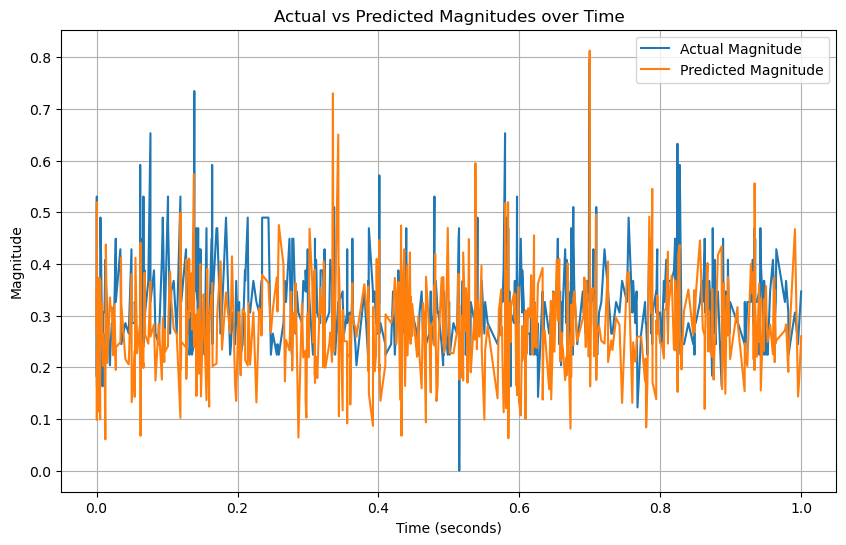

In [41]:
import matplotlib.pyplot as plt

# Plot actual and predicted magnitudes with respect to time
plt.figure(figsize=(10, 6))
plt.plot(results_df['Time (seconds)'], results_df['Actual Magnitude'], label='Actual Magnitude')
plt.plot(results_df['Time (seconds)'], results_df['Predicted Magnitude'], label='Predicted Magnitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Magnitude')
plt.title('Actual vs Predicted Magnitudes over Time')
plt.legend()
plt.grid(True)
plt.show()